## Crude Oil :: Brent vs. West Texas Intermediate (WTI)

We examine the history of crude oil prices, and their spreads.
A Boltzmann portfolio is computed for *optimal* financial positions.

Deflated prices give additional insight, along with some of the
statistical tools useful in financial economics.

***Although WTI is more desirable than Brent from a petrochemical
perspective, that preference is reversed when the metrics
are financial.***

Unless otherwise noted, the price per barrel is in U.S. dollars.
The source of the data is the U.S. Department of Energy via FRED.
We will use Federal Reserve USD index units to compute oil prices in non-dollar terms.

## Petrochemical background

Before exploring our financial metrics, let's get familiar
with the physical aspects.

> **Crude oil is arguably the most crucial commodity in the world today.**
An important issue is the different benchmarks for crude oil prices. 

> The American Petroleum Institute ***API gravity*** is a measure that is
used to compare a petroleum liquid's density to water.
This scale generally falls between 10 and 70, with "light" crude oil
typically having an API gravity on the higher side of the range, while
"heavy" oil has a reading that falls on the lower end of the range.

> The sulfur content of petroleum must also be considered.
***Sulfur content of 0.50% is a key benchmark.***
When oil has a total sulfur level greater than the benchmark, it is considered "sour."
Sulfur content less than the benchmark indicates that an oil is "sweet."
Sour crude oil is more prevalent than its sweet counterpart and comes from
oil sands in Canada, the Gulf of Mexico, some South American nations,
as well as most of the Middle East.
Sweet crude is typically produced in the central United States,
the North Sea region of Europe, and much of Africa and the Asia Pacific region.
*End users generally prefer sweet crude as it requires less processing
to remove impurities than its sour counterpart.*

> [Edited source: Daniela Pylypczak-Wasylyszyn](http://commodityhq.com/education/crude-oil-guide-brent-vs-wti-whats-the-difference)

Light and sweet forms of crude oil are generally valued higher while
heavy and sour types often trade at a discount.
These two key factors distinguish the two major benchmarks for
world oil prices: West Texas Intermediate (WTI) and Brent crude oil.

***WTI is generally lighter and sweeter than Brent, but the supply of each
can differ considerably over time, thus their price difference will vary.***

WTI is refined mostly in the Midwest and Gulf Coast regions of the United States,
while Brent oil is typically refined in Northwest Europe.

#### Approximate characteristics:
- **Brent**: API gravity 38.06, sulfur 0.37%
- **WTI**: API gravity 39.6, sulfur 0.24%

---

*Dependencies:*

- Repository: https://github.com/rsvp/fecon235

*CHANGE LOG*

    2017-08-08  Fix #2 and introduce Boltzmann portfolio of oils.
    2015-05-26  Code review and revision.
    2014-10-09  First version for oil, using 2014-09-28 Template.

In [1]:
from fecon235.fecon235 import *

In [2]:
#  PREAMBLE-p6.15.1223d :: Settings and system details
from __future__ import absolute_import, print_function, division
system.specs()
pwd = system.getpwd()   # present working directory as variable.
print(" ::  $pwd:", pwd)
#  If a module is modified, automatically reload it:
%load_ext autoreload
%autoreload 2
#       Use 0 to disable this feature.

#  Notebook DISPLAY options:
#      Represent pandas DataFrames as text; not HTML representation:
import pandas as pd
pd.set_option( 'display.notebook_repr_html', False )
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True) # url= also works
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True", 
#  which will display results in secondary notebook pager frame in a cell.

#  Generate PLOTS inside notebook, "inline" generates static png:
%matplotlib inline   
#          "notebook" argument allows interactive zoom and resize.

 ::  Python 2.7.13
 ::  IPython 5.1.0
 ::  jupyter_core 4.2.1
 ::  notebook 4.1.0
 ::  matplotlib 1.5.1
 ::  numpy 1.11.0
 ::  scipy 0.17.0
 ::  sympy 1.0
 ::  pandas 0.19.2
 ::  pandas_datareader 0.2.1
 ::  Repository: fecon235 v5.17.0722 develop
 ::  Timestamp: 2017-08-09T09:31:30Z
 ::  $pwd: /media/yaya/virt15h/virt/dbx/Dropbox/ipy/fecon235/nb


In [3]:
#  Define dictionary for dataframe:
oils4d = { 'Brent' : d4brent, 'WTI' : d4wti }

In [4]:
#  Retrieve data:
oils = groupget( oils4d )

## BoW spread := Brent - WTI

***Brent over WTI spread***

In [5]:
#  Define price variables individually for convenience:
brent = oils['Brent']
wti   = oils['WTI']

In [6]:
#  Define BoW: Brent over WTI spread:
bow = todf( brent - wti, 'BoW' )

#### The difference between Brent and WTI is not superficial in the 21st century. Brent over WTI, bow, can represent over 20% of the underlying oil price!

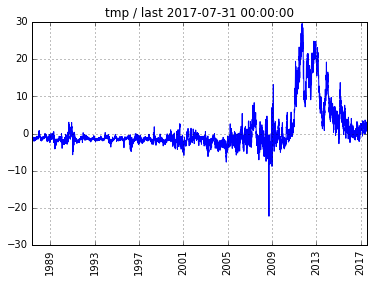

In [7]:
plot( bow )

## Define "Oil" as weighted average price

When BoW is non-zero, the price of "Oil" is ambiguous,
thus we define a weighted average price of oil
between Brent and WTI.

Note that the composition of Brent oil benchmark no longer
really represents Brent as an location.

In [8]:
#  Set wtbrent, the primary weight for Oil:
wtbrent = 0.50
#         0.50 represents the mean
#  ==================================
wtwti   = 1 - wtbrent

#  Weighted average:
oil = todf( (wtbrent * brent) + (wtwti * wti), 'Oil' )

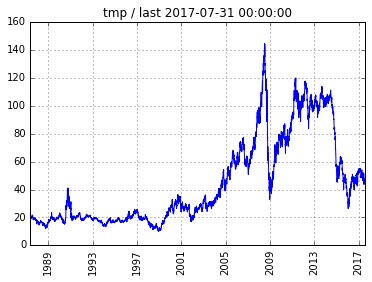

In [9]:
plot( oil )

**The Great Recession plunge from \$140 to \$40 is extraordinary.**
*But so is the post-2014 crash which wiped out legendary traders.*
The volatility is around 33% annualized, as we shall see later.

[Using equal weights, we have created two synthetic series called `d4oil` and `m4oil`
for future convenience.]

In [10]:
#  Temporarily combine data for Brent, WTI, and weighted Oil:
stats( paste([oils, oil]) )

             Brent          WTI          Oil
count  7879.000000  7879.000000  7879.000000
mean     45.011701    44.248576    44.630138
std      33.469778    30.000004    31.660557
min       9.100000    10.820000     9.960000
25%      18.500000    19.850000    19.177500
50%      28.560000    30.080000    29.275000
75%      64.985000    64.870000    64.987500
max     143.950000   145.310000   144.630000

 ::  Index on min:
Brent   1998-12-10
WTI     1998-12-10
Oil     1998-12-10
dtype: datetime64[ns]

 ::  Index on max:
Brent   2008-07-03
WTI     2008-07-03
Oil     2008-07-03
dtype: datetime64[ns]

 ::  Head:
            Brent    WTI     Oil
T                               
1987-05-20  18.63  19.75  19.190
1987-05-21  18.45  19.95  19.200
1987-05-22  18.55  19.68  19.115
 ::  Tail:
            Brent    WTI    Oil
T                              
2017-07-27  50.67  49.05  49.86
2017-07-28  52.00  49.72  50.86
2017-07-31  51.99  50.21  51.10

 ::  Correlation matrix:
          Brent       W

The very tight correlation between Brent and WTI (> 99%)
can mask the potential turbulence of the BoW spread. 

## BoW spread as a function of Oil price

In [11]:
#  Do the regression:
stat2( bow['BoW'], oil['Oil'] )

 ::  FIRST variable:
count    7879.000000
mean        0.763125
std         5.557796
min       -22.180000
25%        -1.810000
50%        -1.160000
75%         0.685000
max        29.590000
Name: BoW, dtype: float64

 ::  SECOND variable:
count    7879.000000
mean       44.630138
std        31.660557
min         9.960000
25%        19.177500
50%        29.275000
75%        64.987500
max       144.630000
Name: Oil, dtype: float64

 ::  CORRELATION
0.625773327194
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     5070.
Date:                Wed, 09 Aug 2017   Prob (F-statistic):               0.00
Time:                        02:31:49   Log-Likelihood:                -22736.
No. Observations:                7879   AIC:                 

Does the price of Oil influence the BoW spread?
Not much, the correlation is about 63%, and the linear regression is not robust.

*To roughly estimate BoW*: take 11% of Oil price and subtract $4.
So higher Oil prices imply greater Brent premium over WTI.

## Record LOW: Oil on 1998-12-10 at 9.96 USD

We use that date to define the variable `tmin`.

In [12]:
tmin = '1998-12-10'

**What is the geometric mean rate since tmin?**

In [13]:
gemrat( oil[tmin:], yearly=256 )

[1.9017090903568512,
 8.6098951245776831,
 33.342833957643094,
 7.4891318245988723,
 256,
 4862]

May 2015: The geometric mean rate since tmin is around 11%
with volatility of 33% -- both very high relative to traditional assets.

Aug 2017: The geometric mean rate since tmin is down to around 2%
with volatility still of 33%. The kurtosis of 7.5 is very high
since it would be 3 for a Gaussian distribution:
hence oil returns are leptokurtotic, i.e. have "fat tails."

## Oil trend since tmin on 1998-12-10

Given the high price volatility,
what seems to be underlying trend?

 ::  regresstime slope = 0.0131256573363


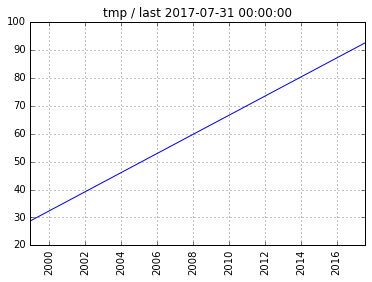

In [14]:
plot( trend(todf(oil[tmin:])) )

Oil prices can easily go +/- 40% off their statistical trend (about 1.2 std).
So the trend is very deceptive.

Aug 2017: the trend indicates \$92 oil, but the
current market average is in fact around \$50.

## Boltzmann portfolio of oils

Given the BoW spread, correlations, volatilities, and overall uptrend --
what would be an *optimal* portfolio structure out-of-sample?

We shall compute a **Boltzmann portfolio**
(see https://git.io/boltz1 for details),
consisting of Brent and WTI, which uses cross-entropy
as its foundation for best geometric growth at minimized risk.

The short-side shall be practically unrestricted (floor=level=-25)
since we assume that crude oil derivatives will be used
to implement the strategy.

The history since *tmin* will be the base,
but the user can modify the date interactively
(see https://git.io/boltz2 for details on sequential decisions).

In [15]:
prtf = boltzportfolio( oils[tmin:], temp=55, floor=-25, level=-25, n=4 )
prtf

[0.7845, [[0.9814, 0.8337, 'Brent'], [0.0186, -1.82, 'WTI']]]

Brent has a higher geometric mean rate (0.83% vs. -1.82 for WTI),
hence ***0.98 of the portfolio's notional principal is dedicated to Brent***,
and 0.02 towards WTI.
The expected geometric mean rate of this particular
Boltzmann portfolio is a mere 0.78%,
hardly better than a Treasury note.

In a Boltzmann portfolio, the second and fourth centralized moments
are taken into account to properly access risk,
and to adjust the geometric mean rates.

This component analysis is more accurate out-of-sample than a
treatment of a single time-series such as the weighted average.

## Deflated oil prices

We use our monthly deflator consisting of CPI and PCE,
both core and headline versions for each,
to compute ***real*** oil prices.

In [16]:
#  First change the sampling frequency to match inflation data:
oilmth = todf(monthly( oil ))
defl = todf(get( m4defl ))
oildefl = todf( oilmth * defl )

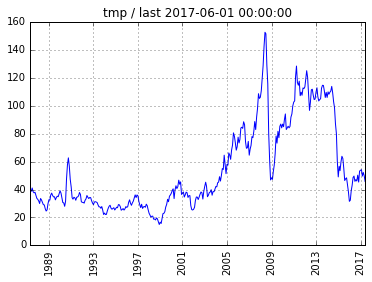

In [17]:
#  Deflated Oil price:
plot( oildefl )

The supportive 1998 uptrend is broken by the post-2014 crash in prices.
The level support from the 1990's is around \$20 in current US dollars.

## Oil price ex-USD

Here we are interested in how oil prices appear when priced in
foreign currencies (outside the United States).
A basket of trade-weighted currencies against USD helps
our foreign exchange viewpoint.

In [18]:
#  rtb is the real trade-weighted USD index,
#      computed monthly by the Federal Reserve.
rtb = get( m4usdrtb )
oilrtb = todf( oilmth / rtb )

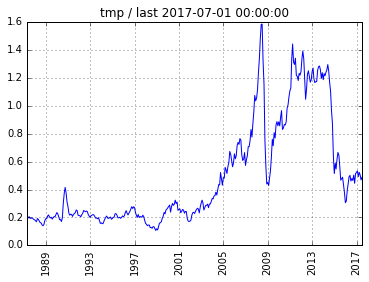

In [19]:
#  Oil priced in rtb index units:
plot( oilrtb )

No big suprises here. Oil from world-ex-USD perspective looks very similar to the dollar-only perspective.

##  Concluding remarks

Although WTI has more desirable petrochemical properties than Brent oil,
our analysis of their prices reveal that Brent is preferable over WTI
in the context of a financial portfolio -- denominated in practically
any currency.

Before taking a position in oil, carefully evaluate the premium of Brent over WTI,
i.e. the BoW spread.

The post-2014 crash in oil prices portends a downward look at
the \$20 support level in current U.S. dollars especially in view
of the caveats listed below.
This would be a major concern for oil companies worldwide
(for example, in August 2017 BP announced their break-even point
was \$47 with respect to the price of oil). 


### Caveats

- A complete analysis would include the impact of shale oil and *alternate energy sources*.

- As electric cars become more popular, the demand for petroleum will obviously diminish.

- If ISIS becomes dominate over oil fields, expect some minor supply at half the market price.

- Be attentive to offshore storage of crude oil, literally on non-active tanker ships with no destinations.

---

*Dedicated to recently retired Andrew Hall: the name of the game has changed.*